In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

base_dir = "./CTCI/Panorama CTCI/Diseño/Gráficos/Estructura"

Mounted at /content/drive


In [ ]:
# This cell set up all the required styling

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.patches import FancyBboxPatch

MAIN_COLOR = "#37539C"

BLUE_PALETTE = [
    "#869CD4",
    "#4969BE",
    "#4062BB",
    "#354F95",
    "#2D4175",
    "#27355A"
]

COLOR_PALETTE = [
    MAIN_COLOR,
    "#59C3C3",
    "#F45B69",
    "#52489C",
    "#9FB7B9",
    "#EBEBEB",
    "#4062BB",
    "#46B1C9",
    "#84C0C6",
    "#BCC1BA",
    "#F2E2D2"
]

def install_open_sans():
  """Install Open Sans fonts from directory, and set them as the default
  """
  fonts_dir = "./CTCI/Panorama CTCI/Diseño/open_sans_fonts"
  for font_path in os.listdir(fonts_dir):
    full_path = os.path.join(fonts_dir, font_path)
    fontManager.addfont(full_path)

def set_properties(font_family, main_color, color_palette):
  # Set font
  mpl.rc('font', family=font_family)
  # Set font weight to bold in everything
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["axes.titleweight"] = "bold"
  mpl.rcParams["axes.labelweight"] = "bold"

  # Set color of text, labels and ticks
  mpl.rcParams['text.color'] = main_color
  mpl.rcParams['axes.labelcolor'] = main_color
  mpl.rcParams['xtick.color'] = main_color
  mpl.rcParams['ytick.color'] = main_color

  # Set default colormap
  mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_palette)

  # Set thant only left and bottom plot spines should be visible
  # (instead of a whole square around the plot)
  mpl.rcParams['axes.spines.left'] = True
  mpl.rcParams['axes.spines.bottom'] = True
  mpl.rcParams['axes.spines.right'] = False
  mpl.rcParams['axes.spines.top'] = False

  # Set horizontal grid
  mpl.rcParams["axes.grid"] = True
  mpl.rcParams["axes.grid.axis"] = "y"
  mpl.rcParams["grid.linestyle"] = "--"

  # Set default linestyle and marker
  mpl.rcParams["lines.linestyle"] = "-"
  mpl.rcParams["lines.marker"] = "o"

  # Set default DPI for image saving (300 is the mininum recommended for printing)
  mpl.rcParams['savefig.dpi'] = 300


install_open_sans()
set_properties("Open Sans", MAIN_COLOR, COLOR_PALETTE)


def round_corners(ax):
  new_patches = []
  old_bottom, old_top = ax.get_ylim()
  for patch in reversed(ax.patches):
      bb = patch.get_bbox()
      if bb.height == 0:
        new_patches.append(patch)
        continue
      color=patch.get_facecolor()
      p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                          abs(bb.width), abs(bb.height),
                          boxstyle="round,pad=-0.0040,rounding_size=0.1",
                          ec="none", fc=color,
                          mutation_aspect=4
                          )
      patch.remove()
      new_patches.append(p_bbox)
  for patch in new_patches:
      ax.add_patch(patch)

  # Fix ylim
  ax.set_ylim(old_bottom, old_top)
plt.rcParams['axes.axisbelow'] = True

## Personal de Investigación y Desarrollo

### Personal total dedicado a I+D en JCE

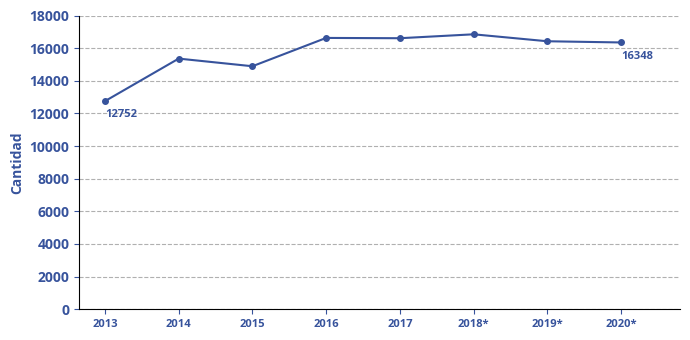

In [ ]:
years =['2013', '2014', '2015', '2016', '2017', '2018*', '2019*', '2020*']
jce = [12752, 15359, 14891, 16626, 16608, 16848, 16422, 16348]

fig, ax = plt.subplots(figsize=(7,3.5))
ax.plot(years, jce, '-o', markersize=4)
ax.set_ylim((0, 18000))
ax.grid(axis='y', linestyle='--')
ax.annotate(jce[0], (years[0], jce[0]-1000), fontsize=8)
ax.annotate(jce[-1], (years[-1], jce[-1]-1000), fontsize=8)
ax.set_xlim(right=7.8)
ax.tick_params(axis='x', labelsize=8)
ax.set_ylabel('Cantidad')
plt.tight_layout()
plt.savefig(base_dir+'/personal_total_dedicado_ImasD.png')
plt.savefig(base_dir+'/personal_total_dedicado_ImasD.svg')

### Personal I+D según nivel educacional y sector de ejecución
https://www.observa.minciencia.gob.cl/indicadores/investigacion-y-desarrollo-id/personal-en-id-segun-nivel-educacional-y-sector-de-ejecucion

In [ ]:
years = list(range(2013,2019))
ies = [[11, 7, 37, 12, 33], [6, 8, 41, 11, 34], [7, 8, 35, 13, 37], [7, 6, 37, 15, 35], [5, 6, 40, 12, 37],
       [6, 5, 38, 11, 40]]

empresas = [[24, 14, 49, 8, 4], [33, 15, 42, 7, 3], [17, 20, 52, 8, 3], [20, 17, 49, 9, 5], [19, 13, 51, 10, 7],
             [13, 12, 57, 11, 7]]

estado = [[19, 13, 37, 19, 12], [15, 18, 39, 16, 12], [19, 14, 35, 18, 14], [19, 18, 39, 15, 9], [16, 21, 40, 14, 9],
          [20, 19, 38, 13, 10]]

ipsfl = [[9, 8, 49, 12, 21], [5, 23, 48, 9, 15], [14, 15, 46, 10, 15], [9, 5, 50, 15, 21], [7, 6, 54, 12, 21],
          [7, 6, 50, 14, 23]]

for i in [ies, empresas, estado, ipsfl]:
  for j in i:
    assert sum(j)>98 and sum(j)<102
    assert len(j) == 5

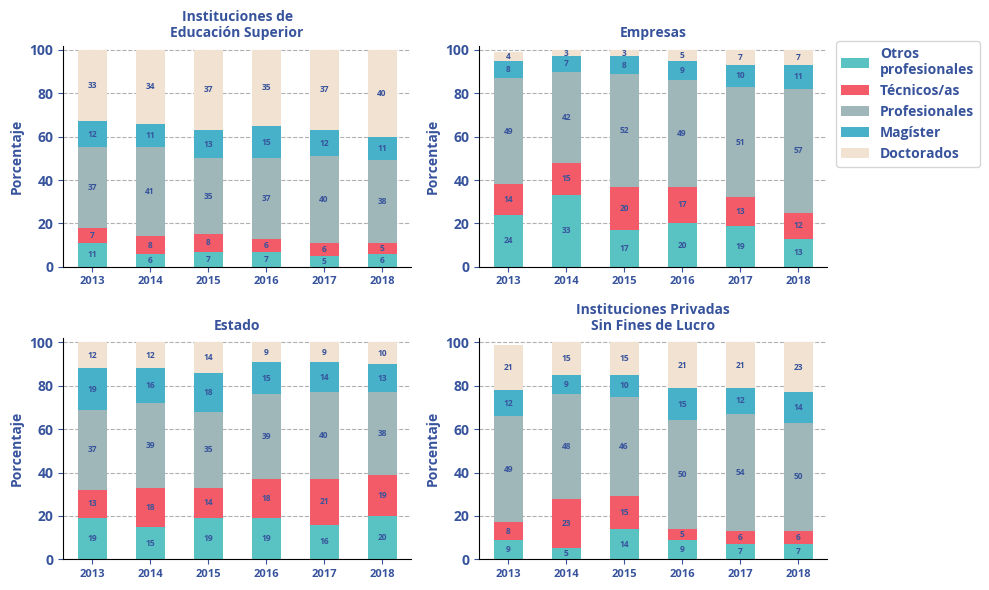

In [ ]:
df1 = pd.DataFrame({'Otros\nprofesionales': [j[0] for j in ies], 'Técnicos/as': [j[1] for j in ies],
                   'Profesionales': [j[2] for j in ies], 'Magíster': [j[3] for j in ies],
                   'Doctorados': [j[4] for j in ies]}, index=years).astype(int)
df2 = pd.DataFrame({'Otros\nprofesionales': [j[0] for j in empresas], 'Técnicos/as': [j[1] for j in empresas],
                   'Profesionales': [j[2] for j in empresas], 'Magíster': [j[3] for j in empresas],
                   'Doctorados': [j[4] for j in empresas]}, index=years).astype(int)
df3 = pd.DataFrame({'Otros\nprofesionales': [j[0] for j in estado], 'Técnicos/as': [j[1] for j in estado],
                   'Profesionales': [j[2] for j in estado], 'Magíster': [j[3] for j in estado],
                   'Doctorados': [j[4] for j in estado]}, index=years).astype(int)
df4 = pd.DataFrame({'Otros\nprofesionales': [j[0] for j in ipsfl], 'Técnicos/as': [j[1] for j in ipsfl],
                   'Profesionales': [j[2] for j in ipsfl], 'Magíster': [j[3] for j in ipsfl],
                   'Doctorados': [j[4] for j in ipsfl]}, index=years).astype(int)

dfs = [df1, df2, df3, df4]
fig, axs = plt.subplots(2,2,figsize=(10,6))

names = ['Instituciones de\nEducación Superior', 'Empresas', 'Estado', 'Instituciones Privadas\nSin Fines de Lucro']

for i, df in enumerate(dfs):
  df.plot(kind='bar', stacked=True, ax=axs[i//2,i%2], legend=False if i!=1 else True, rot=0,
          color=[COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[4], COLOR_PALETTE[7], COLOR_PALETTE[10]])
  axs[i//2,i%2].tick_params(axis='x', labelsize=8)
  axs[i//2,i%2].set_ylabel('Porcentaje')
  #axs[i//2,i%2].grid(axis='y')#, linestyle='--')
  axs[i//2, i%2].grid(False,axis='x')
  axs[i//2,i%2].set_title(names[i], fontsize=10)
  axs[i//2,i%2].set_ylim((0,102))
  for c in axs[i//2,i%2].containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = [int(i) for i in labels]
    axs[i//2, i%2].bar_label(c, labels=labels, label_type='center', fontsize=6, fmt='%i')
  if i ==1:
    axs[i//2, i%2].legend(bbox_to_anchor=(1.005, 1.05))
plt.tight_layout()
plt.savefig(base_dir+'/personal_ImasD_nivel_ed_y_sector_ejec.png')
plt.savefig(base_dir+'/personal_ImasD_nivel_ed_y_sector_ejec.svg')

plt.show()

### Porcentaje mujeres JCE trabajando en I+D

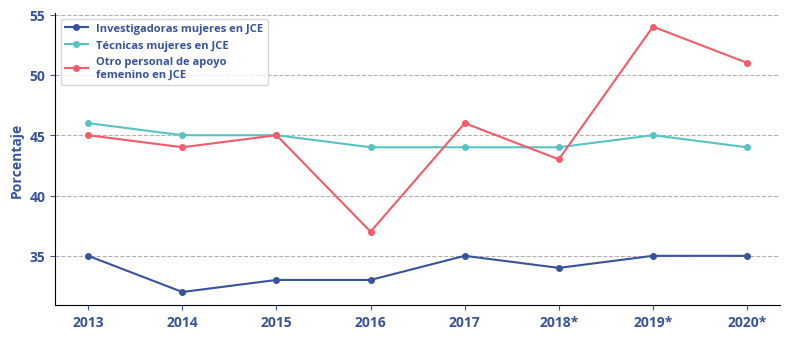

In [ ]:
investig = [35, 32, 33, 33, 35, 34, 35, 35]
tecnicas = [46, 45, 45, 44, 44, 44, 45, 44]
otro = [45, 44, 45, 37, 46, 43, 54, 51]
years = ['2013', '2014', '2015', '2016', '2017', '2018*', '2019*', '2020*']

fig, ax = plt.subplots(figsize=(8, 3.5))
ax.plot(years, investig, '-o', markersize=4, label='Investigadoras mujeres en JCE')
ax.plot(years, tecnicas, '-o', markersize=4, label='Técnicas mujeres en JCE')
ax.plot(years, otro, '-o', markersize=4, label='Otro personal de apoyo\nfemenino en JCE')
ax.legend(fontsize=8)
ax.set_ylabel('Porcentaje')
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig(base_dir+'/porcent_mujeres_jce_ImasD.png')
plt.savefig(base_dir+'/porcent_mujeres_jce_ImasD.svg')

### Cantidad de investigadores en JCE

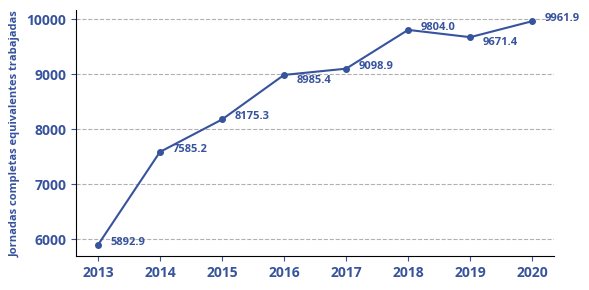

In [ ]:
cantd = [5892.9, 7585.2, 8175.3, 8985.4, 9098.9, 9804.0, 9671.4, 9961.9]
years = list(range(2013, 2021))

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(years, cantd, markersize=4)
ax.set_ylabel('Jornadas completas equivalentes trabajadas', fontsize=8)
for i in range(len(years)):
  if i == 3 or i == 6:
    ax.annotate(cantd[i], (years[i]+0.2, cantd[i]-150), fontsize=8)
  else:
    ax.annotate(cantd[i], (years[i]+0.2, cantd[i]), fontsize=8)
plt.tight_layout()
plt.savefig(base_dir + '/cantid_investig_total.png')
plt.savefig(base_dir + '/cantid_investig_total.svg')
plt.show()

### Investigadores según disciplina

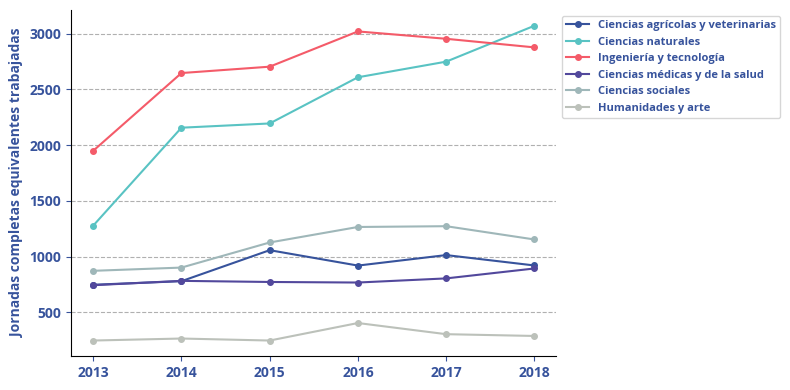

In [ ]:
agric_vets = [748, 780, 1058, 920, 1014, 921]
cs_nat = [1278, 2156, 2194, 2608, 2748, 3070]
ing_tecn = [1949, 2646, 2703, 3019, 2953, 2876]
cs_meds_salud = [744, 783, 773, 768, 805, 894]
cs_soc = [873, 902, 1127, 1266, 1273, 1154]
hum_arte = [248, 266, 248, 405, 305, 289]
years=list(range(2013, 2019))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(years, agric_vets, '-o', markersize=4, label='Ciencias agrícolas y veterinarias')
ax.plot(years, cs_nat, '-o', markersize=4, label='Ciencias naturales')
ax.plot(years, ing_tecn, '-o', markersize=4, label='Ingeniería y tecnología')
ax.plot(years, cs_meds_salud, '-o', markersize=4, label='Ciencias médicas y de la salud')#, color=COLOR_PALETTE[])
ax.plot(years, cs_soc, '-o', markersize=4, label='Ciencias sociales')
ax.plot(years, hum_arte, '-o', markersize=4, label='Humanidades y arte', color=COLOR_PALETTE[9])
ax.legend(fontsize=8, bbox_to_anchor=(1,1))
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('Jornadas completas equivalentes trabajadas')
plt.tight_layout()
plt.savefig(base_dir+'/investigadores_ImasD_area_conocimiento.png')
plt.savefig(base_dir+'/investigadores_ImasD_area_conocimiento.svg')

### Investigadores por región

In [ ]:
excel = pd.read_excel(base_dir + '/Personal dedicado al I+D.xlsx', skiprows=1, index_col=0)
excel = excel.rename(columns={'Magallanes y la Antártica Chilena': 'Magallanes y la\nAntártica Chilena'})
excel = excel.rename(index={'Investigadores totales en JCE': 'Total investigadores/as'})
excel.head()

,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O'Higgins,Maule,Ñuble,Biobío,La Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes y la\nAntártica Chilena
Investigadoras en JCE,42,19,70,10,47,290,1887,45,66,38,308,71,88,118,34,37
Total investigadores/as,136,58,212,52,144,936,5338,124,193,113,924,189,255,329,81,96
Porcentaje de JCE ejecutadas por mujeres investigadoras,"31,1%","32,0%","33,2%","20,1%","32,6%","31,0%","35,3%","36,3%","34,0%","33,6%","33,3%","37,5%","34,5%","35,9%","41,3%","38,8%"


In [ ]:
excel_t = excel.T
total = excel_t['Total investigadores/as'].sum()
excel_t['Porcentaje del total'] = [np.round(x,2) for x in excel_t['Total investigadores/as']*100/total]
excel = excel_t.T
excel

,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O'Higgins,Maule,Ñuble,Biobío,La Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes y la\nAntártica Chilena
Investigadoras en JCE,42,19,70,10,47,290,1887,45,66,38,308,71,88,118,34,37
Total investigadores/as,136,58,212,52,144,936,5338,124,193,113,924,189,255,329,81,96
Porcentaje de JCE ejecutadas por mujeres investigadoras,"31,1%","32,0%","33,2%","20,1%","32,6%","31,0%","35,3%","36,3%","34,0%","33,6%","33,3%","37,5%","34,5%","35,9%","41,3%","38,8%"
Porcentaje del total,1.48,0.63,2.31,0.57,1.57,10.2,58.15,1.35,2.1,1.23,10.07,2.06,2.78,3.58,0.88,1.05


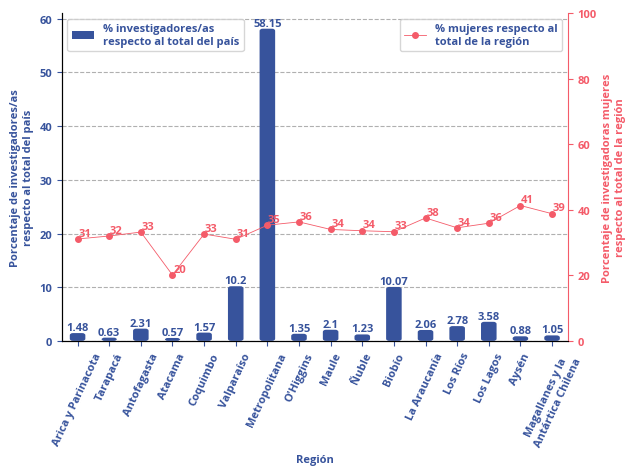

In [ ]:
plt.rcParams.update({'font.size': 8})
ax = excel.T.plot.bar(y='Porcentaje del total', rot=65,
                      label='% investigadores/as\nrespecto al total del país')
ax.bar_label(ax.containers[0], fontsize=8)
ax.legend(loc='upper left')
ax2 = ax.twinx()
def p2f(x):
  return float(x.strip('%'))#/100
percents = [p2f(j) for j in [i.replace(',','.') for i in excel.loc['Porcentaje de JCE ejecutadas por mujeres investigadoras']]]
ax2.plot(excel.columns, percents, '-o', color=COLOR_PALETTE[2], linewidth=0.6, markersize=4, label='% mujeres respecto al\ntotal de la región')
#plt.title('Investigadores en JCE por región (año 2020)', fontsize=10)
for i,j in enumerate(percents):
    ax2.annotate(str(int(np.round(j))),xy=(i+0.02,j+1), fontsize=8, color=COLOR_PALETTE[2])
ax2.set_ylim((0,100))
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(COLOR_PALETTE[2])
ax2.yaxis.label.set_color(COLOR_PALETTE[2])
ax2.tick_params(axis='y', colors=COLOR_PALETTE[2])
ax2.grid(False, axis='y')
ax2.grid(False, axis='x')
ax.grid(False, axis='x')
ax.set_xlabel('Región')
ax2.legend()
ax2.set_ylabel('Porcentaje de investigadoras mujeres\nrespecto al total de la región')
ax.set_ylabel('Porcentaje de investigadores/as\nrespecto al total del país')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/total_investig_region.svg')
plt.savefig(base_dir+'/total_investig_region.png')
plt.show()

### Cantidad de investigadores/as cada mil personas trabajando en países de la OCDE

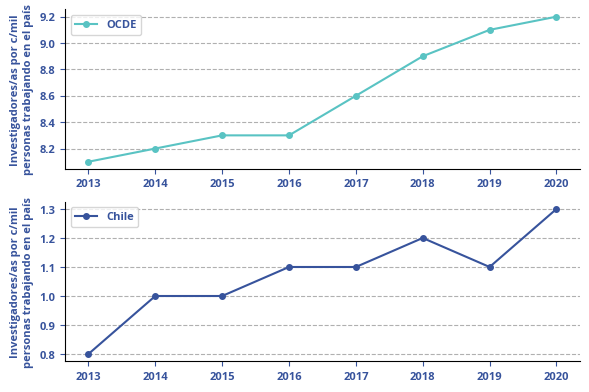

In [ ]:
chile = [0.8, 1.0, 1.0, 1.1, 1.1, 1.2, 1.1, 1.3]
ocde = [8.1, 8.2, 8.3, 8.3, 8.6, 8.9, 9.1, 9.2]
years = list(range(2013, 2021))

fig, axs = plt.subplots(2,1,figsize=(6,4))
axs[1].plot(years, chile, '-o', markersize=4, label='Chile')
axs[0].plot(years, ocde, '-o', markersize=4, label='OCDE', color=COLOR_PALETTE[1])#, c='orange')
axs[0].legend()
axs[1].legend()
axs[0].grid(axis='y', linestyle='--')
axs[1].grid(axis='y', linestyle='--')
axs[0].set_ylabel('Investigadores/as por c/mil\npersonas trabajando en el país', fontsize=8)
axs[1].set_ylabel('Investigadores/as por c/mil\npersonas trabajando en el país', fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/inv_cada_mil_mundo.png')
plt.savefig(base_dir+'/inv_cada_mil_mundo.svg')

plt.show()

### Investigadores cada mil personas trabajando

In [ ]:
df = pd.read_excel(base_dir + '/invests_mil.xlsx', index_col=0, header=None)
df.head()

,1
0,
Corea del Sur,16.6
Finlandia,15.9
Suecia,15.8
Dinamarca,14.9
Bélgica,13.6


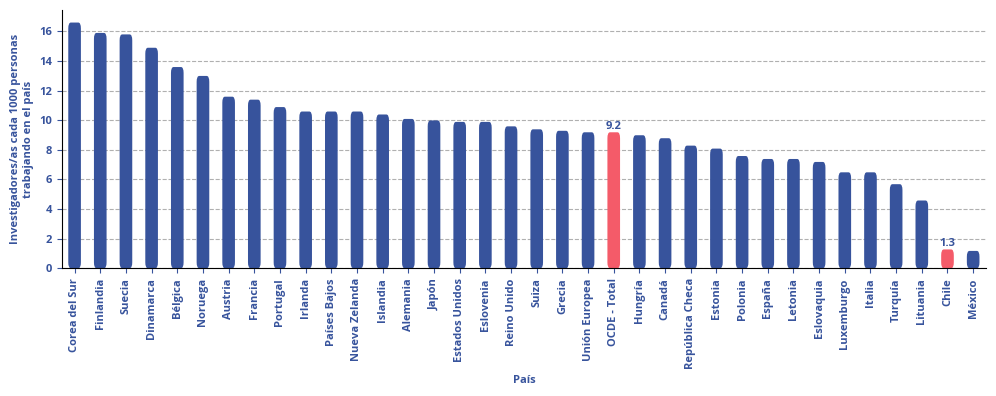

In [ ]:

plt.rc('axes', axisbelow=True)
fig, ax = plt.subplots(figsize=(10,4))
#ax.axhline(9.2, color='red', linestyle='--', linewidth=0.8)
#ax.axhline(1.3, color='red', linestyle='--', linewidth=0.8)
df.plot.bar(ax=ax, legend= False)#, color=my_colors)
#ax.set_xlabel('País')
ax.tick_params(axis='x', labelsize=8)#, rotation=45)
#ax.bar_label(p.containers[0], fontsize=8)
ax.get_children()[21].set_color(COLOR_PALETTE[2])
ax.get_children()[34].set_color(COLOR_PALETTE[2])
ax.grid(False, axis='x')
rects = ax.patches
ax.set_xlabel('País')
for index, rect in enumerate(rects):
    if index in [21, 34]:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, height,
                ha='center', va='bottom')
ax.set_ylabel('Investigadores/as cada 1000 personas\ntrabajando en el país', fontsize=8)
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir + '/invest_por_mil_pais.png')
plt.savefig(base_dir + '/invest_por_mil_pais.svg')
plt.show()

## Instituciones de Educación Superior

### Instituciones de educación superior

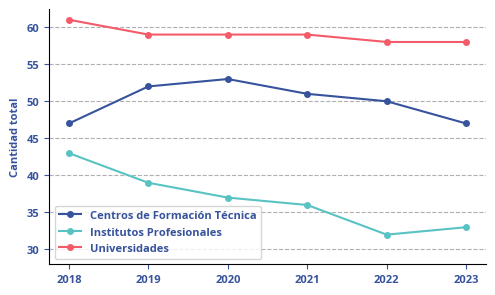

In [ ]:
cfts = [47, 52, 53, 51, 50, 47]
ips = [43, 39, 37, 36, 32, 33]
us = [61, 59, 59, 59, 58, 58]

plt.figure(figsize=(5,3))
plt.plot(['2018', '2019', '2020', '2021', '2022', '2023'], cfts, '-o', label='Centros de Formación Técnica',
         markersize=4)
plt.plot(['2018', '2019', '2020', '2021', '2022', '2023'], ips, '-o', label='Institutos Profesionales',
         markersize=4)
plt.plot(['2018', '2019', '2020', '2021', '2022', '2023'], us, '-o', label='Universidades',
         markersize=4)
plt.legend(loc='lower left', fontsize=8)
#plt.title('Evolución anual IES en general')
plt.grid(axis='y', linestyle='--')
plt.ylim(bottom=28)
plt.tight_layout()
#plt.xlabel('Año')
plt.ylabel('Cantidad total')
plt.tight_layout()
plt.savefig(base_dir + '/evol_ies.png')
plt.savefig(base_dir + '/evol_ies.svg')
plt.show()

### Instituciones de educación superior desagregadas por región

In [ ]:

excel_18 = pd.read_excel(base_dir+'/listado_instituciones_vigentes_31_diciembre_2018.xlsx')
excel_23 = pd.read_excel(base_dir+'/listado_instituciones_vigentes_31_diciembre_2023.xlsx')

excel_23 = excel_23[excel_23['Tipo de institución']!='FFAA y defensa']

excel_18 = excel_18[['Tipo de institución', 'Región']]
excel_23 = excel_23[['Tipo de institución', 'Región']]

excel_18.head()

,Tipo de institución,Región
0,Centros de Formación Técnica,Región del Maule
1,Centros de Formación Técnica,Región Metropolitana
2,Centros de Formación Técnica,Región de La Araucanía
3,Centros de Formación Técnica,Región del Biobío
4,Centros de Formación Técnica,Región Metropolitana


In [ ]:
regiones_ordenadas = ['Región de Arica y Parinacota', 'Región de Tarapacá', 'Región de Antofagasta', 'Región de Atacama',
                      'Región de Coquimbo', 'Región de Valparaíso', 'Región Metropolitana', 'Región del Libertador General Bernardo O\'Higgins',
                      'Región del Maule', 'Región del Ñuble', 'Región del Biobío', 'Región de La Araucanía', 'Región de Los Ríos',
                      'Región de Los Lagos', 'Región de Aysén del General Carlos Ibañez del Campo', 'Región de Magallanes y de la Antártica Chilena']
df_count_18 = pd.DataFrame(np.zeros((len(regiones_ordenadas), 3)), columns=['Centros de Formación Técnica',
                                                                      'Institutos Profesionales',
                                                                      'Universidades'], index=regiones_ordenadas)
df_count_23 = pd.DataFrame(np.zeros((len(regiones_ordenadas), 3)), columns=['Centros de Formación Técnica',
                                                                      'Institutos Profesionales',
                                                                      'Universidades'], index=regiones_ordenadas)

for i, row in excel_18.iterrows():
  if 'Centros de Formación' in row['Tipo de institución']:
    df_count_18['Centros de Formación Técnica'].loc[row['Región']] += 1
  elif 'Institutos Profesionales' in row['Tipo de institución']:
    df_count_18['Institutos Profesionales'].loc[row['Región']] += 1
  elif 'Universidades' in row['Tipo de institución']:
    df_count_18['Universidades'].loc[row['Región']] += 1
  else:
    print(row['Tipo de institución'])
    assert 1 == 0

for i, row in excel_23.iterrows():
  if 'Centros de Formación' in row['Tipo de institución']:
    df_count_23['Centros de Formación Técnica'].loc[row['Región']] += 1
  elif 'Institutos Profesionales' in row['Tipo de institución']:
    df_count_23['Institutos Profesionales'].loc[row['Región']] += 1
  elif 'Universidades' in row['Tipo de institución']:
    df_count_23['Universidades'].loc[row['Región']] += 1
  else:
    print(row['Tipo de institución'])
    assert 1 == 0
df_count_18.head()

,Centros de Formación Técnica,Institutos Profesionales,Universidades
Región de Arica y Parinacota,1.0,0.0,1.0
Región de Tarapacá,0.0,0.0,1.0
Región de Antofagasta,1.0,0.0,2.0
Región de Atacama,1.0,0.0,1.0
Región de Coquimbo,3.0,0.0,1.0


In [ ]:
df_count_cft = pd.concat([df_count_18['Centros de Formación Técnica'], df_count_23['Centros de Formación Técnica']],
                         keys=['2018', '2023'], axis=1)
df_count_ips = pd.concat([df_count_18['Institutos Profesionales'], df_count_23['Institutos Profesionales']],
                         keys=['2018', '2023'], axis=1)
df_count_us = pd.concat([df_count_18['Universidades'], df_count_23['Universidades']],
                         keys=['2018', '2023'], axis=1)

df_count_cft = df_count_cft.reindex(index=df_count_cft.index[::-1])
df_count_cft = df_count_cft.rename(index={'Región de Aysén del General Carlos Ibañez del Campo': 'Región de Aysén del Gral.\nCarlos Ibañez del Campo',
                                           'Región del Libertador General Bernardo O\'Higgins': 'Región del Libertador Gral.\nBernardo O\'Higgins'})
df_count_ips = df_count_ips.reindex(index=df_count_ips.index[::-1])
df_count_ips = df_count_ips.rename(index={'Región de Aysén del General Carlos Ibañez del Campo': 'Región de Aysén del Gral.\nCarlos Ibañez del Campo',
                                           'Región del Libertador General Bernardo O\'Higgins': 'Región del Libertador Gral.\nBernardo O\'Higgins'})
df_count_us = df_count_us.reindex(index=df_count_us.index[::-1])
df_count_us = df_count_us.rename(index={'Región de Aysén del General Carlos Ibañez del Campo': 'Región de Aysén del Gral.\nCarlos Ibañez del Campo',
                                           'Región del Libertador General Bernardo O\'Higgins': 'Región del Libertador Gral.\nBernardo O\'Higgins'})

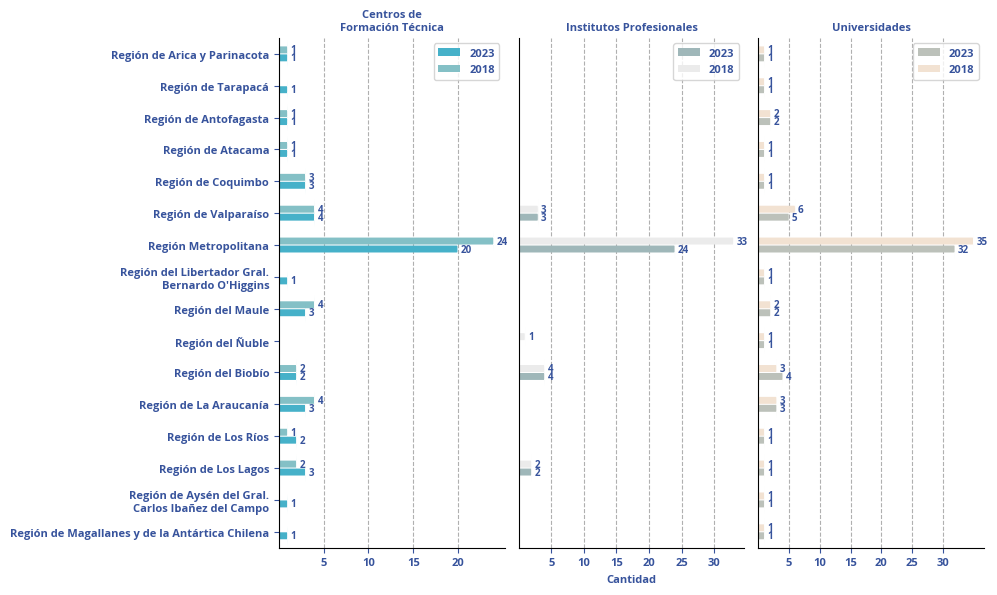

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,6))
c0 = df_count_cft.plot.barh(y=['2023', '2018'], ax=ax[0], color=[COLOR_PALETTE[7],COLOR_PALETTE[8]])
c1 = df_count_ips.plot.barh(y=['2023', '2018'], ax=ax[1], color=[COLOR_PALETTE[4], COLOR_PALETTE[5]])
c2 = df_count_us.plot.barh(y=['2023', '2018'], ax=ax[2], color=[COLOR_PALETTE[9], COLOR_PALETTE[10]])
plt.rc('axes', axisbelow=True)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[2].tick_params(axis='x', labelsize=8)
ax[0].set_xticks([5,10,15,20])
ax[1].set_xticks([5,10,15,20, 25, 30])
ax[2].set_xticks([5,10,15,20, 25, 30])
ax[1].set_yticks([])
ax[2].set_yticks([])
ax[0].legend(fontsize=8)
ax[1].legend(fontsize=8)
ax[2].legend(fontsize=8)
ax[0].grid(axis='x', linestyle='--')
ax[1].grid(axis='x', linestyle='--')
ax[2].grid(axis='x', linestyle='--')
cs = [c0, c1, c2]
for i in range(3):
  labels0 = [int(v) if v > 0 else "" for v in cs[i].containers[0].datavalues]
  labels1 = [int(v) if v > 0 else "" for v in cs[i].containers[1].datavalues]
  ax[i].bar_label(cs[i].containers[0], labels=labels0 ,
                  fontsize=7, padding=2)
  ax[i].bar_label(cs[i].containers[1], labels=labels1,
                  fontsize=7, padding=2)
ax[0].set_title('Centros de\nFormación Técnica', fontsize=8)
ax[1].set_title('Institutos Profesionales', fontsize=8)
ax[2].set_title('Universidades', fontsize=8)
ax[1].set_xlabel('Cantidad',fontsize=8)
fig.subplots_adjust(wspace=0.04)
ax[0].grid(False, axis='y')
round_corners(ax[0])
round_corners(ax[1])
round_corners(ax[2])
plt.tight_layout()
plt.savefig(base_dir+'/IES_region.png')
plt.savefig(base_dir+'/IES_region.svg')
plt.show()

## Centro I+D+i

### Centros I+D por instrumento según taxonomía

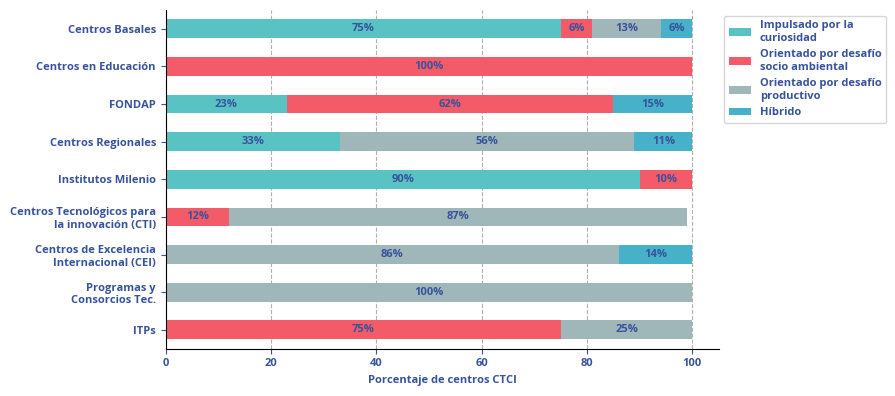

In [ ]:
df = pd.DataFrame({'ITPs': [0, 75, 25, 0], 'Programas y\nConsorcios Tec.': [0, 0, 100, 0],
                   'Centros de Excelencia\nInternacional (CEI)': [0, 0, 86, 14], 'Centros Tecnológicos para\nla innovación (CTI)': [0, 12, 87, 0], 'Institutos Milenio': [90, 10, 0, 0],
                   'Centros Regionales': [33, 0, 56, 11], 'FONDAP': [23, 62, 0, 15], 'Centros en Educación' : [0, 100, 0, 0],
                  'Centros Basales': [75, 6, 13, 6] }, index=["Impulsado por la\ncuriosidad", 'Orientado por desafío\nsocio ambiental',
                                                              'Orientado por desafío\nproductivo', 'Híbrido']).T
fig, ax = plt.subplots(figsize=(9,4))

df.plot.barh(stacked=True, ax=ax, color=[COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[4], COLOR_PALETTE[7]])#, COLOR_PALETTE[10]])
ax.legend(fontsize=8, bbox_to_anchor=(1,1))
for i in range(4):
  ax.bar_label(ax.containers[i], label_type='center', fmt=lambda x: f'{x:.0f}%' if x >0 else '', fontsize=8)
ax.set_xlabel('Porcentaje de centros CTCI')
ax.grid(False, axis='y')
plt.tight_layout()
plt.savefig(base_dir+'/centros_ImasD_instrumento_taxonomia.png')
plt.savefig(base_dir+'/centros_ImasD_instrumento_taxonomia.svg')
plt.show()

## Empresas de Base Científica-Tecnológica

### EBCTs por región

In [ ]:
excel1 = pd.read_excel(base_dir+'/2018-EBCT-cuadros-de-resultados.xlsx', sheet_name=2, skiprows=2,
                       index_col=0, usecols=[1,2,3,4])

reg_index = []
for reg in excel1.index:
  if 'Metrop' in reg:
    reg_index.append(reg)
  else:
    reg = reg.split(" ")
    reg = " ".join(reg[1:])
    reg_index.append(reg)

excel1.index = reg_index

#excel1 = excel1.sort_values('Número de empresas')
excel1 = excel1.drop("distintas a la RM")
excel1 = excel1.drop("")
excel1.head(n=20)

,Número de empresas,Porcentaje del total,Porcentaje del total sin contar RM
Región de Arica y Parinacota,2,0.006645,0.018349
Región de Tarapacá,1,0.003322,0.009174
Región de Antofagasta,5,0.016611,0.045872
Región de Atacama,1,0.003322,0.009174
Región de Coquimbo,4,0.013289,0.036697
Región de Valparaíso,27,0.089701,0.247706
Región Metropolitana de Santiago,192,0.637874,-
Región del Libertador General Bernardo O’Higgins,3,0.009967,0.027523
Región del Maule,8,0.026578,0.073394
Región de Ñuble,2,0.006645,0.018349


In [ ]:
excel2 = pd.read_excel(base_dir+'/Tabulados EBCT2 regional - 2020.xlsx', sheet_name=2, skiprows=2,
                       index_col=0)
for row in excel2.index:
  if "Macrozona" in row:
    excel2=excel2.drop(row)
excel2 = excel2.iloc[:-3]
excel2 = excel2.rename(index={'Región del Ñuble': 'Región de Ñuble'})
excel2 = excel2.reindex(excel1.index)
excel2.head(n=20)
#excel2 = excel2.sort_values('Número de empresas')

,Número de empresas,Porcentaje del total,Porcentaje del total sin contar RM
Región de Arica y Parinacota,2,0.006079,0.014706
Región de Tarapacá,2,0.006079,0.014706
Región de Antofagasta,6,0.018237,0.044118
Región de Atacama,1,0.003040,0.007353
Región de Coquimbo,4,0.012158,0.029412
Región de Valparaíso,38,0.115502,0.279412
Región Metropolitana de Santiago,193,0.586626,-
Región del Libertador General Bernardo O’Higgins,5,0.015198,0.036765
Región del Maule,6,0.018237,0.044118
Región de Ñuble,8,0.024316,0.058824


In [ ]:
list(excel1['Número de empresas'])

[2, 1, 5, 1, 4, 27, 192, 3, 8, 2, 31, 10, 2, 13]

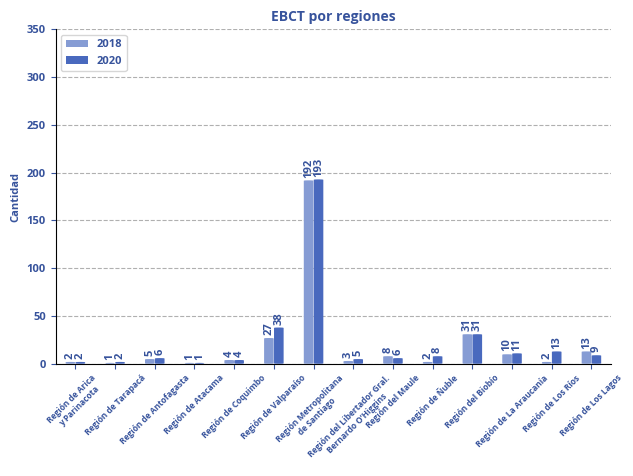

In [ ]:
new_index = []
for i in excel1.index:
  if 'Libertador' in i:
    i = 'Región del Libertador Gral.\nBernardo O’Higgins'
  elif 'Arica' in i:
    i = 'Región de Arica\ny Parinacota'
  elif 'Metropolitana' in i:
    i = 'Región Metropolitana\nde Santiago'
  new_index.append(i)

df = pd.DataFrame({'2018': list(excel1['Número de empresas']), '2020': list(excel2['Número de empresas'])},
                  index=new_index)
#df_total = pd.DataFrame({'2018': sum(df['2018']), '2020': sum(df['2020'])}, index=['Total'])
#df = df.append(df_total)

ax = df.plot(y=["2018", '2020'], kind="bar", rot=45, color=[BLUE_PALETTE[0], BLUE_PALETTE[1]])#, width=2)
ax.legend(fontsize=8, loc='upper left')
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=8)
ax.grid(axis='y', linestyle='--')
ax.bar_label(ax.containers[0], labels=df['2018'], fontsize=8, rotation=90, padding=2)
ax.bar_label(ax.containers[1], labels=df['2020'], fontsize=8, rotation=90, padding=2)
plt.rcParams['axes.axisbelow'] = True
ax.set_ylabel('Cantidad')
ax.set_ylim((0,350))
ax.set_title('EBCT por regiones', fontsize=10)
ax.grid(False, axis='x')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/evol_reg_ebcts.svg')
plt.savefig(base_dir+'/evol_reg_ebcts.png')
plt.show()

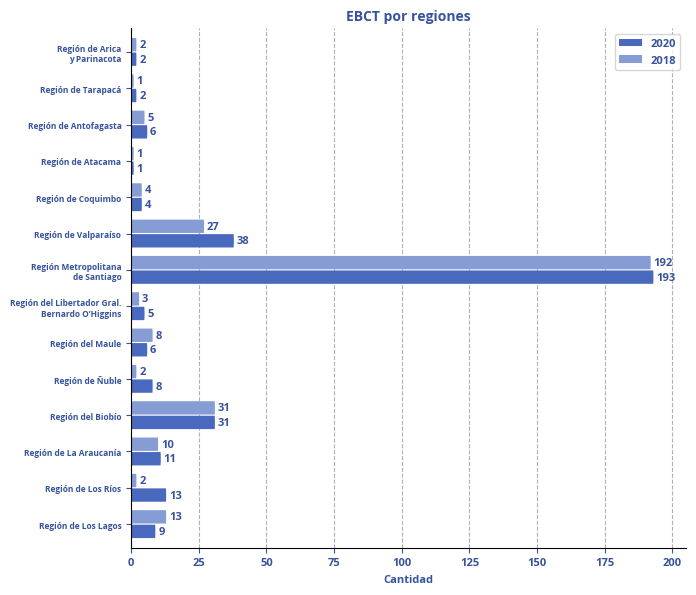

In [ ]:
new_index = []
for i in excel1.index:
  if 'Libertador' in i:
    i = 'Región del Libertador Gral.\nBernardo O’Higgins'
  elif 'Arica' in i:
    i = 'Región de Arica\ny Parinacota'
  elif 'Metropolitana' in i:
    i = 'Región Metropolitana\nde Santiago'
  new_index.append(i)

df = pd.DataFrame({'2018': list(excel1['Número de empresas']), '2020': list(excel2['Número de empresas'])},
                  index=new_index)
#df_total = pd.DataFrame({'2018': sum(df['2018']), '2020': sum(df['2020'])}, index=['Total'])
#df = df.append(df_total)
df = df.iloc[::-1]
df = df[reversed(df.columns)]

ax = df.plot(y=['2020', '2018'], kind="barh", color=[BLUE_PALETTE[1], BLUE_PALETTE[0]], width=0.8,
             figsize=(7,6))#, rot=45)#, width=2)
ax.legend(fontsize=8, loc='upper right')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=6)
ax.grid(axis='x', linestyle='--')
ax.bar_label(ax.containers[0], labels=df['2020'], fontsize=8, rotation=0, padding=2)
ax.bar_label(ax.containers[1], labels=df['2018'], fontsize=8, rotation=0, padding=2)
plt.rcParams['axes.axisbelow'] = True
ax.set_xlim((0,205))
ax.set_title('EBCT por regiones', fontsize=10)
ax.set_xlabel('Cantidad')
ax.grid(False, axis='y')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/evol_reg_ebcts.png')
plt.savefig(base_dir+'/evol_reg_ebcts.svg')
plt.show()

### Género de líderes de EBCTs


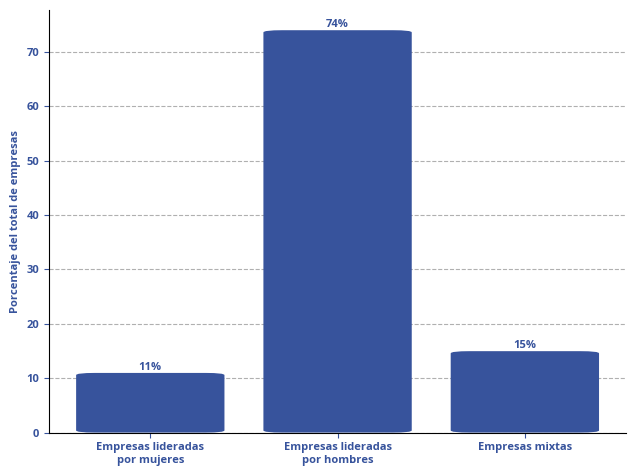

In [ ]:
fig, ax = plt.subplots()

ax.bar(['Empresas lideradas\npor mujeres', 'Empresas lideradas\npor hombres', 'Empresas mixtas'], [11, 74, 15])
ax.bar_label(ax.containers[0], fmt='%.0f%%')#, color=['tab:cyan', 'red', 'green'])
ax.set_ylabel('Porcentaje del total de empresas')
ax.grid(axis='y', linestyle='--')
#ax.set_xlabel('Género')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/lideres_ebcts.png')
plt.savefig(base_dir+'/lideres_ebcts.svg')
plt.show()

## Empresas que innovan

### Cantidad de empresas que innovan
En esta sección se agrupan 3 cuadros de resultados (ENI 2019-2020, ENI 2017-2018, ENI 2011-2012), disponibles para su descarga en https://www.observa.minciencia.gob.cl/encuesta/encuesta-nacional-de-innovacion, de donde se obtienen los valores definidos en la primera celda de código. Además, se hace una muestra gráfica del porcentaje de empresas que innovan con respecto al total de las empresas para cada período.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tasa_innovacion = pd.DataFrame({'2009-2010': [126819, 24376.94],
                                '2011-2012': [144146, 34134.93],
                                '2013-2014': [163418.06, 27160.30],
                                '2015-2016': [176895, 26645.57],
                                '2017-2018': [175288.43, 24674.21],
                                '2019-2020': [190084.56, 31832.41]},
                               index=['Total de empresas',
                                      'Total de empresas que innovan'])
tasa_innovacion.loc['Tasa de innovación total'] = [tasa_innovacion.iloc[1][i]*100/tasa_innovacion.iloc[0][i] \
                                                   for i in range(6)]
tasa_innovacion

,2009-2010,2011-2012,2013-2014,2015-2016,2017-2018,2019-2020
Total de empresas,126819.000000,144146.000000,163418.060000,176895.00000,175288.430000,190084.560000
Total de empresas que innovan,24376.940000,34134.930000,27160.300000,26645.57000,24674.210000,31832.410000
Tasa de innovación total,19.221836,23.680803,16.620134,15.06293,14.076348,16.746447


<ipython-input-177-1b68adc2a8f2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x, rotation=45)


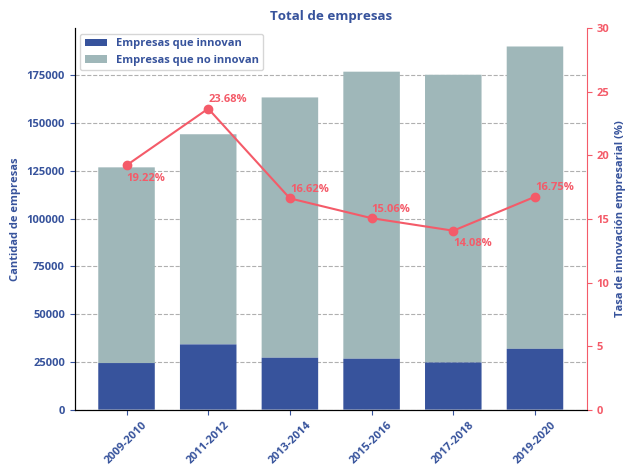

In [ ]:
plt.rc('axes', axisbelow=True)
x = tasa_innovacion.columns
y1 = tasa_innovacion.loc['Total de empresas que innovan'].values
y2 = tasa_innovacion.loc['Total de empresas'].values-tasa_innovacion.loc['Total de empresas que innovan'].values
y3 = tasa_innovacion.loc['Tasa de innovación total'].values

fig, axs = plt.subplots()
#axs2 = axs.twinx()
axs.bar(x, y1, #color='mediumaquamarine',
        width=0.7, label='Empresas que innovan')
axs.bar(x, y2, bottom=y1, #color='wheat',
        width=0.7, label='Empresas que no innovan', color=COLOR_PALETTE[4])

axs2 = axs.twinx()
axs2.plot(x, y3, 'o-', color=COLOR_PALETTE[2])
axs.grid(axis='y', linestyle='--')

# add text annotation corresponding to the percentage of each data.
#for xpos, ypos, yval in zip(x, y1/2, y3):
#    plt.text(xpos, ypos, "%.2f"%yval+'%', ha="center", va="center")

axs.set_xticklabels(x, rotation=45)

axs.legend(fontsize=8)
axs.set_title('Total de empresas')
axs.set_ylabel('Cantidad de empresas')
axs2.set_ylabel('Tasa de innovación empresarial (%)')
axs2.set_ylim((0,30))

for i in range(len(tasa_innovacion.columns)):
  if i == 0 or i == 4:
    axs2.annotate("%.2f"%y3[i]+'%', (x[i], y3[i]-1.2), color=COLOR_PALETTE[2])
  else:
    axs2.annotate("%.2f"%y3[i]+'%', (x[i], y3[i]+0.5), color=COLOR_PALETTE[2])

axs2.xaxis.label.set_color(COLOR_PALETTE[2])
axs2.spines['right'].set_visible(True)
axs2.tick_params(axis='y', colors=COLOR_PALETTE[2])
axs2.spines['right'].set_color(COLOR_PALETTE[2])
axs2.grid(False, axis='y')

round_corners(axs)
plt.tight_layout()
plt.savefig(base_dir + '/porcentaj_empr_innov.png')
plt.savefig(base_dir + '/porcentaj_empr_innov.svg')
plt.show()

### Tasa de innovación por tamaño
https://www.observa.minciencia.gob.cl/indicadores/innovacion-y-desarrollo-de-negocios/tasa-de-innovacion-por-tamano

<ipython-input-155-0d6113bb492d>:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


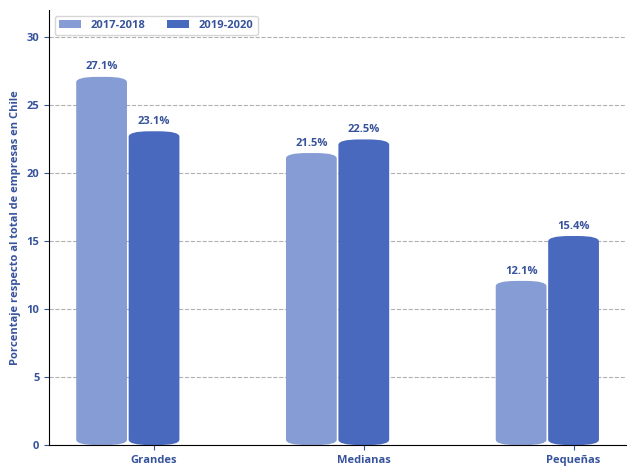

In [ ]:
sizes = ['Grandes', 'Medianas', 'Pequeñas']
innov_rate = {'2017-2018': [27.1, 21.5, 12.1],
              '2019-2020': [23.1, 22.5, 15.4]}

x = np.arange(len(sizes))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')


for i, (attribute, measurement) in enumerate(innov_rate.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=BLUE_PALETTE[i])
    ax.bar_label(rects, padding=3, fmt='%.1f%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje respecto al total de empresas en Chile')
#ax.set_title('Porcentaje de empresas que innovaron respecto al total de empresas\nen Chile según tamaño de las empresas')
ax.set_xticks(x + width, sizes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 32)
round_corners(ax)
plt.tight_layout()

plt.savefig(base_dir+'/empresas_innov_por_tamano.png')
plt.savefig(base_dir+'/empresas_innov_por_tamano.svg')

plt.show()

### Porcentaje de empresas que innovan respecto al total de empresas de cada macrozona en el periodo 2019 y 2020

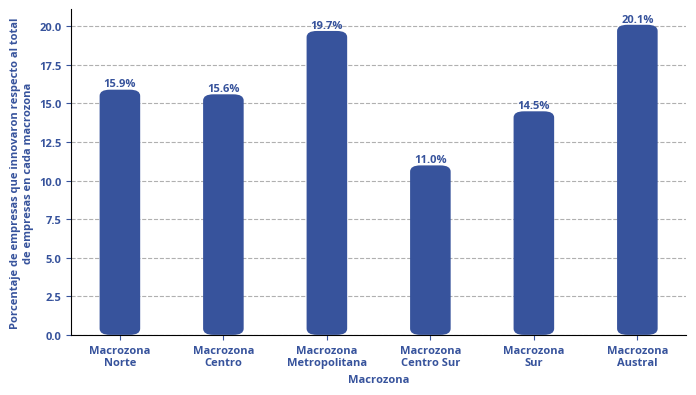

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(['Macrozona\nNorte','Macrozona\nCentro', 'Macrozona\nMetropolitana', 'Macrozona\nCentro Sur', 'Macrozona\nSur', 'Macrozona\nAustral'],
       [15.9, 15.6, 19.7, 11.0, 14.5, 20.1], width=0.4)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.set_ylabel('Porcentaje de empresas que innovaron respecto al total\nde empresas en cada macrozona')
round_corners(ax)
ax.set_xlabel('Macrozona')
plt.tight_layout()
plt.savefig(base_dir+'/empresas_innovan_macrozona.png')
plt.savefig(base_dir+'/empresas_innovan_macrozona.svg')
plt.show()

### Empresas que hacen I+D por años de antigüedad

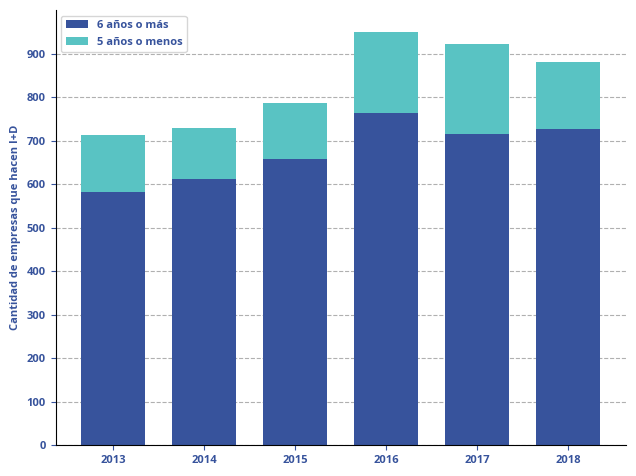

In [ ]:
cinco=[130, 119, 129, 186, 206, 153]
seis=[583, 611, 657, 764, 715, 727]
years=list(range(2013, 2019))

plt.bar(years, seis, label='6 años o más', width=0.7)
plt.bar(years,cinco, bottom=seis, label='5 años o menos', width=0.7)
#plt.xlabel('Año')
plt.ylabel('Cantidad de empresas que hacen I+D')
plt.grid(axis='y', linestyle='--')
plt.ylim((0,1000))
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
plt.legend()
plt.tight_layout()
plt.savefig(base_dir + '/evol_ImasD_antiguedad.png')
plt.savefig(base_dir + '/evol_ImasD_antiguedad.svg')

### Cantidad de empresas que hacen I+D según tamaño

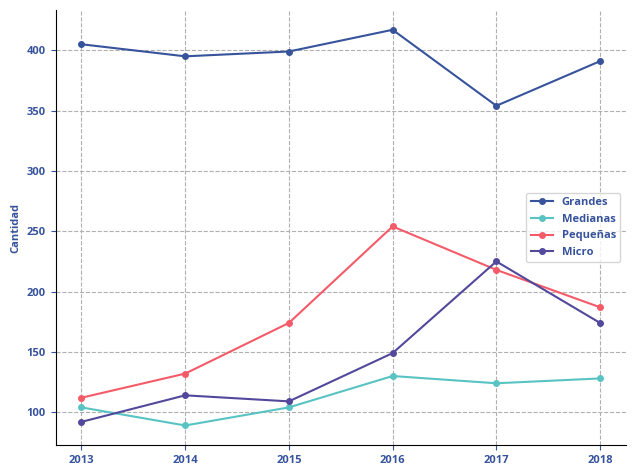

In [ ]:
df = pd.read_excel(base_dir + '/empresas_tamano.xlsx', index_col=0).T
df = df[['Grandes', 'Medianas', 'Pequeñas', 'Micro']]
ax = df.plot.line(markersize=4)
ax.set_ylabel('Cantidad')
plt.tight_layout()
plt.savefig(base_dir+'/cant_empresas_por_tamano0.png')
plt.savefig(base_dir+'/cant_empresas_por_tamano0.svg')

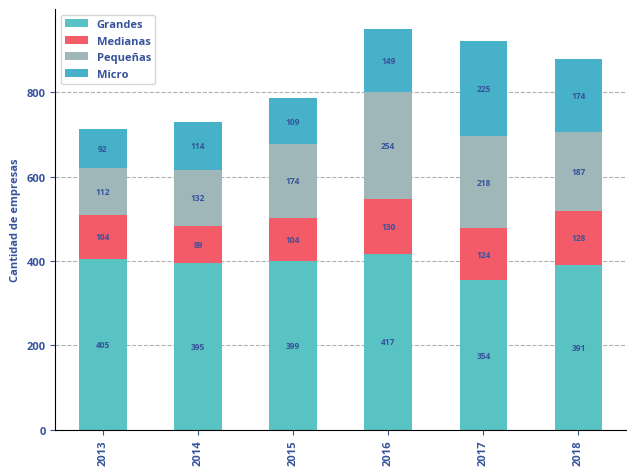

In [ ]:
ax = df.plot.bar(stacked=True, color=[COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[4], COLOR_PALETTE[7]])
ax.legend(fontsize=8)
ax.tick_params(labelsize=8)
ax.bar_label(ax.containers[0], fontsize=6, label_type='center')
ax.bar_label(ax.containers[1], fontsize=6, label_type='center')
ax.bar_label(ax.containers[2], fontsize=6, label_type='center')
ax.bar_label(ax.containers[3], fontsize=6, label_type='center')
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('Cantidad de empresas')
#ax.set_xlabel('Año')
ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir+'/cant_empresas_por_tamano.png')
plt.savefig(base_dir+'/cant_empresas_por_tamano.svg')
plt.show()

## Emprendedores/as

### Proyectos de emprendimientos apoyados por CORFO

In [ ]:
excel = pd.read_excel(base_dir+'/Base de datos Semilla - Publica.xlsx')
excel = excel[excel['Año de aprobación']>2012]
excel.head()

,Año de aprobación,Programa,Sector económico,Tipo postulante,País procedencia emprendimiento,Region procedencia emprendimiento,Región,Monto financiamiento aprobado,Número de integrantes,Género del integrante 1 del equipo,...,Impacto social emprendimiento 2021,Dimensiones impacto social emprendimiento 2021,Impacto social emprendimiento 2022,Dimensiones impacto social emprendimiento 2022,Sobrevivencia 2017,Sobrevivencia 2018,Sobrevivencia 2019,Sobrevivencia 2020,Sobrevivencia 2021,Sobrevivencia 2022
1129,2013,SSAF Innovación,Publicidad e industrias creativas,Persona jurídica,Chile,Región de los Ríos,Región de los Ríos,10000000.0,4.0,Hombre,...,NaN,NaN,NaN,NaN,No,No,No,No,No,No
1130,2013,SSAF Innovación,Manufactura,Persona jurídica,Chile,Región de los Lagos,Región de los Lagos,10000000.0,3.0,Hombre,...,Sí,Capital Humano,NaN,NaN,Si,Si,Si,Si,Si,Si
1131,2013,SSAF Innovación,Servicios financieros y empresariales,Persona jurídica,Chile,Región Metropolitana,Región Metropolitana,60000000.0,3.0,Hombre,...,Sí,Capital Social,NaN,NaN,Si,Si,Si,Si,Si,Si
1132,2013,SSAF Innovación,Publicidad e industrias creativas,Persona jurídica,Chile,Región Metropolitana,Región Metropolitana,60000000.0,5.0,Hombre,...,NaN,NaN,NaN,NaN,No,No,No,No,No,No
1133,2013,SSAF Innovación,Informática y tecnologías de la información,Persona jurídica,Chile,Región Metropolitana,Región Metropolitana,10000000.0,2.0,Hombre,...,NaN,NaN,NaN,NaN,Si,No,No,No,No,No


In [ ]:
years = list(range(2013, 2023))
cantidad = [len(excel[excel['Año de aprobación']==i]) for i in years]
programas = list(excel['Programa'].unique())
cant_por_prog = []

for p in programas:
  cant_por_prog.append([len(excel[excel['Año de aprobación']==i][excel['Programa']==p]) for i in years])

for i, p in enumerate(programas):
  if p == "Programa Regional de Apoyo al Emprendimiento":
    programas[i] = "Prog. Regional de Apoyo\nal Emprendimiento"
  elif p == 'Escalamiento en la Producción de Ventiladores Mecánicos':
    programas[i] = 'Escalamiento en la Prod.\nde Ventiladores Mecánicos'

<ipython-input-119-fbd6e6f4008b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cant_por_prog.append([len(excel[excel['Año de aprobación']==i][excel['Programa']==p]) for i in years])


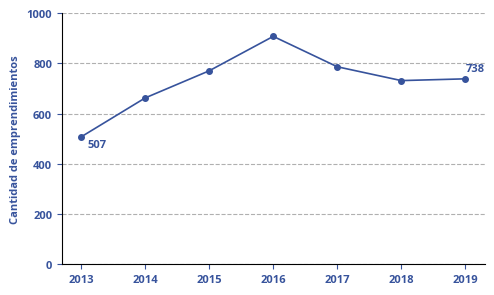

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(years[:-3], cantidad[:-3], linewidth=1.2, markersize=4)
#plt.title('Cantidad total de emprendimientos apoyados\npor programas CORFO')#, fontsize=8)
#plt.xlabel('Año')#, fontsize=8)
ax.set_ylabel('Cantidad de emprendimientos')#, fontsize=8)
ax.grid(axis='y', linestyle='--')
ax.set_ylim((0,1000))
ax.annotate(cantidad[0], (years[0]+0.1, cantidad[0]-40))
ax.annotate(cantidad[-4], (years[-4], cantidad[-4]+30))
plt.tight_layout()
plt.savefig(base_dir + '/programas_por_ano.png')
plt.savefig(base_dir + '/programas_por_ano.svg')
plt.show()

### proyectos de emprendimientos apoyados por CORFO según región de procedencia


In [ ]:
years = list(range(2013, 2023))
cantidad = [len(excel[excel['Año de aprobación']==i]) for i in years]
#regiones = list(excel['Region procedencia emprendimiento'].unique())
regiones = ['Región de Arica y Parinacota', 'Región de Tarapacá', 'Región de Antofagasta', 'Región de Atacama',
            'Región de Coquimbo', 'Región de Valparaíso', 'Región Metropolitana', "Región del Libertador Gral.\nBernardo O'\\Higgins",
            'Región del Maule', 'Región de Ñuble', 'Región del Biobío', 'Región de la Araucanía', 'Región de los Ríos',
            'Región de los Lagos', 'Región de Aysén del\nGral. Carlos Ibáñez del Campo', 'Región de Magallanes\ny Antártica Chilena']
cant_por_reg = []

for r in regiones:
  cant_por_reg.append([len(excel[excel['Año de aprobación']==i][excel['Region procedencia emprendimiento']==r]) for i in years])


for i, r in enumerate(regiones):
  if r == "Región de Aysén del General Carlos Ibáñez del Campo":
    regiones[i] = "Región de Aysén del\nGral. Carlos Ibáñez del Campo"
  elif r == "Región de Magallanes y Antártica Chilena":
    regiones[i] = 'Región de Magallanes\ny Antártica Chilena'
  elif r == "Región del Libertador General Bernardo O'Higgins":
    regiones[i] = "Región del Libertador Gral.\nBernardo O'\Higgins"

<ipython-input-121-affcba42abb8>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cant_por_reg.append([len(excel[excel['Año de aprobación']==i][excel['Region procedencia emprendimiento']==r]) for i in years])


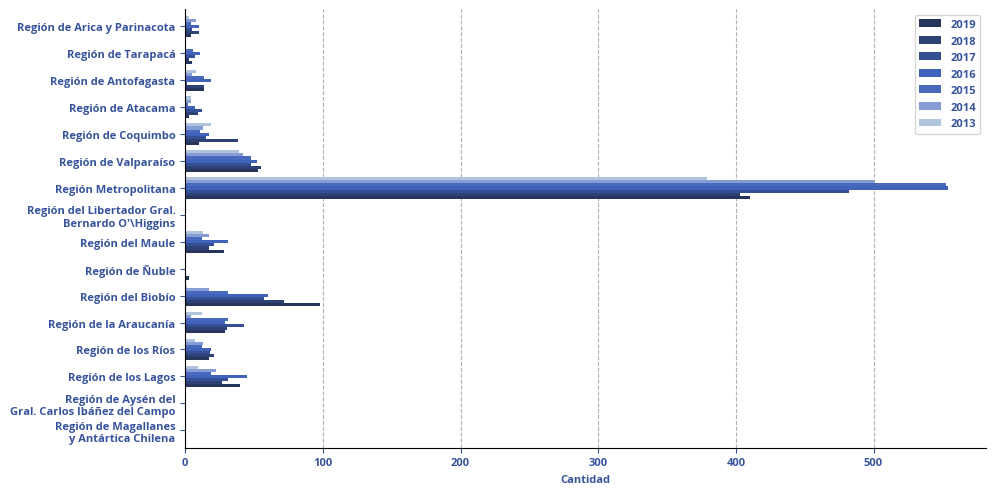

In [ ]:
from matplotlib import cm
cant_por_reg2 = []
for i in cant_por_reg:
  cant_por_reg2.append(i[:-3])

#color1 = cm.Blues_r(np.linspace(.1, .6, 7))
color1 = [BLUE_PALETTE[5],BLUE_PALETTE[4],BLUE_PALETTE[3],BLUE_PALETTE[2],BLUE_PALETTE[1],BLUE_PALETTE[0], 'lightsteelblue']#BLUE_PALETTE[0]]
fig, ax = plt.subplots(figsize=(10,5))
df_regiones = pd.DataFrame(cant_por_reg2, index=regiones, columns=years[:-3])
df_regiones = df_regiones.reindex(index=df_regiones.index[::-1])
df_regiones.plot.barh(y =np.flip(years[:-3]), width=0.8,
                           ax=ax, color=color1)
ax.tick_params(axis='both', labelsize=8)
ax.grid(False, axis='y')
ax.legend(fontsize=8)
ax.set_xlabel('Cantidad')
plt.tight_layout()
plt.savefig(base_dir + '/region_programas_por_ano_barras.png')
plt.savefig(base_dir + '/region_programas_por_ano_barras.svg')
plt.show()

### proyectos de emprendimientos apoyados por Corfo según género de su líder


<ipython-input-123-6ee203bfc52f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lider_hombre = [len(excel[excel['Año de aprobación']==i][excel['Género del integrante 1 del equipo']=='Hombre']) for i in years]
<ipython-input-123-6ee203bfc52f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lider_mujer = [len(excel[excel['Año de aprobación']==i][excel['Género del integrante 1 del equipo']=='Mujer']) for i in years]
<ipython-input-123-6ee203bfc52f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  presencia_hombre = [len(excel[excel['Año de aprobación']==i][excel['Género del equipo']=='Sólo hombres']) for i in years]
<ipython-input-123-6ee203bfc52f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  presencia_mujer = [len(excel[excel['Año de aprobación']==i][excel['Género del equipo']=='Al menos una mujer en el equipo']) for i in years]


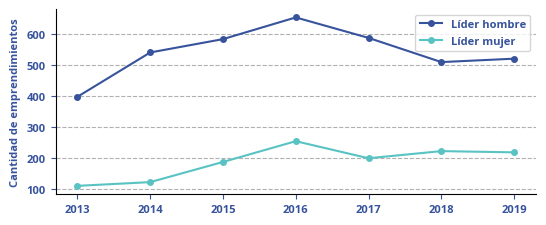

In [ ]:
years = list(range(2013, 2023))
lider_hombre = [len(excel[excel['Año de aprobación']==i][excel['Género del integrante 1 del equipo']=='Hombre']) for i in years]
lider_mujer = [len(excel[excel['Año de aprobación']==i][excel['Género del integrante 1 del equipo']=='Mujer']) for i in years]

presencia_hombre = [len(excel[excel['Año de aprobación']==i][excel['Género del equipo']=='Sólo hombres']) for i in years]
presencia_mujer = [len(excel[excel['Año de aprobación']==i][excel['Género del equipo']=='Al menos una mujer en el equipo']) for i in years]

plt.figure(figsize=(5.5,2.3))
plt.plot(years[:-3], lider_hombre[:-3], label='Líder hombre', markersize=4)
plt.plot(years[:-3], lider_mujer[:-3], label='Líder mujer', markersize=4)
plt.legend(fontsize=8)
#plt.title('Género de la/el líder en proyectos\napoyados por CORFO', fontsize=8)
plt.ylabel('Cantidad de emprendimientos', fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig(base_dir+'/genero_ano1.png')
plt.savefig(base_dir+'/genero_ano1.svg')
plt.show()

## Inventores

### Inventores por género

In [ ]:
df = pd.DataFrame({'Solicitudes de patentes': [403, 420], 'Inventores hombres': [655, 677],
                   'Inventoras mujeres': [165, 210]}, index=[2021, 2022])
df

,Solicitudes de patentes,Inventores hombres,Inventoras mujeres
2021,403,655,165
2022,420,677,210


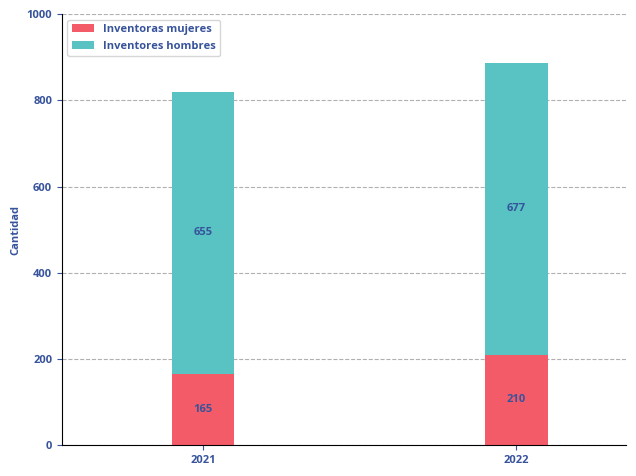

In [ ]:
fig, ax = plt.subplots()#figsize=(10,6))
#df.plot.bar(y=['Solicitudes de patentes'], ax=ax, position=1, color='lightgreen', width=0.2, rot=0)
df.plot.bar(y=['Inventoras mujeres', 'Inventores hombres'], stacked=True, ax=ax,#position=0,
            width=.2, rot=0, color=[COLOR_PALETTE[2], COLOR_PALETTE[1]])

ax.legend(fontsize=8, loc='upper left')
plt.rc('axes', axisbelow=True)
ax.grid(axis='y', linestyle='--')
ax.set_xlim(left=-0.45)
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = int(height)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',
            va='center', fontsize=8)
#ax.set_title('Solicitudes de patentes y cantidad de inventores/as')
ax.set_ylabel('Cantidad')
ax.grid(False, axis='x')
#ax.set_xlabel('Año')
ax.set_ylim(top=1000)
plt.tight_layout()
plt.savefig(base_dir+'/patentes_e_inventores.png')
plt.savefig(base_dir+'/patentes_e_inventores.svg')
plt.show()

### Inventores (Género)
https://www.inapi.cl/docs/default-source/2023/centro-de-documentacion/estudios/reporte-de-genero-sobre-solicitudes-de-patentes-en-chile/analisis_de_las_mujeres_inventoras_ano_2023_inapi.pdf?sfvrsn=7a187460_2

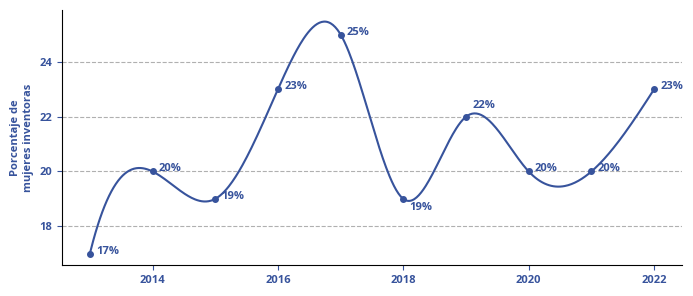

In [ ]:
from scipy.interpolate import make_interp_spline
years = np.array(list(range(2013,2023)))
percents = np.array([17, 20, 19, 23, 25, 19, 22, 20, 20, 23])

X_Y_Spline = make_interp_spline(years, percents)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(years.min(), years.max(), 500)
Y_ = X_Y_Spline(X_)

# Plotting the Graph
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(X_, Y_, '-', color=COLOR_PALETTE[0])
ax.plot(years, percents, 'o', color=COLOR_PALETTE[0], markersize=4)
#ax.set_title("Proporción de inventoras en Solicitudes de\npatentes de invención residentes")
ax.set_ylabel("Porcentaje de\nmujeres inventoras")
#ax.set_xlabel("Año")
for i,txt in enumerate(percents):
  if i == 5:
    ax.annotate(str(txt)+'%', (years[i]+0.1, percents[i]-0.4))
  elif i == 6:
    ax.annotate(str(txt)+'%', (years[i]+0.1, percents[i]+0.3))
  else:
    ax.annotate(str(txt)+'%', (years[i]+0.1, percents[i]))
plt.tight_layout()
plt.savefig(base_dir + '/inventores_genero.png')
plt.savefig(base_dir + '/inventores_genero.svg')
plt.show()